In [1]:
words = open("names.txt", "r").read().splitlines() # Python list of names
print(words[:10])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
32033


In [13]:
# Use Pandas to print out words and length descending
import pandas as pd
df = pd.DataFrame(words, columns=["words"])
df["length"] = df["words"].str.len()
df = df.sort_values(by="length", ascending=False)
print(df.head(5))

                 words  length
31441  muhammadibrahim      15
31442  muhammadmustafa      15
12005   mariaguadalupe      14
16272   elizabethgrace      14
17404   oluwafifehanmi      14


In [14]:
print(df.tail(5))

      words  length
25524    sy       2
28280    lj       2
19928    om       2
26015    ry       2
25235    ed       2


Welche Information steckt in einem Wort?

Beispielsweise bei dem Wort "isabella", folgt das "s" wahrscheinlich ein Vokal, bei dem Wort "isabell" folgt das "l" wahrscheinlich ein Konsonant. usw...
Und vor allem:

Nach dem "a" am Ende ist es wahrscheinlich, dass das Wort endet.

Man merkt, dass viele statistischen Informationen schon bereits in einem Wort stecken.

# Bigram Modell
Ein Bigram Modell ist ein Modell, welches die Wahrscheinlichkeit eines Buchstaben, abhängig von dem vorherigen Buchstaben berechnet.

Ein Bigramm, auch Digramm genannt, ist eine Sequenz von zwei benachbarten Elementen aus einer Reihe von Token, die typischerweise Buchstaben, Silben oder Wörter sind. Ein Bigramm ist also ein N-Gramm für n=2. In der Textanalyse und der computergestützten Linguistik wird die Frequenzverteilung jedes Bigramms in einem Text häufig für einfache statistische Analysen verwendet.

In der praktischen Anwendung können Bigramme beispielsweise in Suchmaschinen verwendet werden, um das nächste Wort in einem unvollständigen Satz vorherzusagen oder um statistische Sprachmodelle für die Verarbeitung natürlicher Sprache zu erstellen.

In [20]:
print(words[1]+":")
for w in words[1:2]:
    # aktuelles zeichen und das nächste zeichen -> Bigramm
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

olivia:
o l
l i
i v
v i
i a


Nun wollen wir mit einem Bestimmten Char den Anfang und das Ende eines Wortes markieren:

In [18]:
for w in words[1:2]:
    chs = ["<S>"] + list(w) + ["<E>"] # Add start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> o
o l
l i
i v
v i
i a
a <E>


In [21]:
for w in words[0:3]:
    chs = ["<S>"] + list(w) + ["<E>"] # Add start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [26]:
b = {} # Dictionary for bigrams

for w in words[0:3]:
    chs = ["<S>"] + list(w) + ["<E>"] # Add start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # erstellt einen eintrag im dictionary mit dem key bigram und dem wert 0, dadurch wird der wert um 1 erhöht wenn der key schon existiert
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

Weil das Bigramm "a <E>" bei "emma", "olivia" und "ava", 3x vorgekommen ist, ist die Wahrscheinlichkeit, dass nach einem "a" ein Wort endet, 3/3 = 1.
Zumindest in diesem Beispiel.

Nun für alle:

In [28]:
b = {} # Dictionary for bigrams

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"] # Add start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # erstellt einen eintrag im dictionary mit dem key bigram und dem wert 0, dadurch wird der wert um 1 erhöht wenn der key schon existiert
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [31]:
# sort descending
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [2]:
# lieber mit pytorch als array speichern, damit man besser arbeiten kann
import torch

Da wir 26 Buchstaben haben + 2 für den Anfang und das Ende, haben wir 28x28 = 784 mögliche Bigramme.

Da ein Bigramm aus 2 Buchstaben besteht haben wir 28^2 = 784 mögliche Bigramme, die in einer Liste mit ihrem jeweiligen Count je Index gespeichert werden sollen.

In [13]:
N = torch.zeros((28, 28), dtype=torch.int32) # N, weil es die Counts der Bigramme listet

In [3]:
# Strings mit Ints kodieren
" ".join(words)

'emma olivia ava isabella sophia charlotte mia amelia harper evelyn abigail emily elizabeth mila ella avery sofia camila aria scarlett victoria madison luna grace chloe penelope layla riley zoey nora lily eleanor hannah lillian addison aubrey ellie stella natalie zoe leah hazel violet aurora savannah audrey brooklyn bella claire skylar lucy paisley everly anna caroline nova genesis emilia kennedy samantha maya willow kinsley naomi aaliyah elena sarah ariana allison gabriella alice madelyn cora ruby eva serenity autumn adeline hailey gianna valentina isla eliana quinn nevaeh ivy sadie piper lydia alexa josephine emery julia delilah arianna vivian kaylee sophie brielle madeline peyton rylee clara hadley melanie mackenzie reagan adalynn liliana aubree jade katherine isabelle natalia raelynn maria athena ximena arya leilani taylor faith rose kylie alexandra mary margaret lyla ashley amaya eliza brianna bailey andrea khloe jasmine melody iris isabel norah annabelle valeria emerson adalyn ry

In [4]:
# Rauschmeißen von Dubletten mit set(da diese immer unique sind) und entfernen des leerzeichens
alphabet = set(''.join(words))
print(alphabet)

{'a', 'f', 'b', 's', 'v', 'u', 'g', 'l', 'p', 'y', 'i', 'd', 'h', 'c', 'm', 'o', 'r', 'j', 'x', 'n', 'z', 't', 'k', 'w', 'q', 'e'}


In [7]:
# sortieren als liste
alphabet = sorted(list(alphabet))
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [11]:
# Mapping zwischen Buchstaben und Index
char2idx = {ch: i for i, ch in enumerate(alphabet)}
char2idx["<S>"] = 26
char2idx["<E>"] = 27
char2idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [14]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        N[ix1, ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [15]:
# Da man N so schwer lesen kann inverten wir erstmal das mapping:
#char2idx = {ch: i for i, ch in enumerate(alphabet)}
idx2char = {i: ch for ch, i in char2idx.items()}
idx2char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

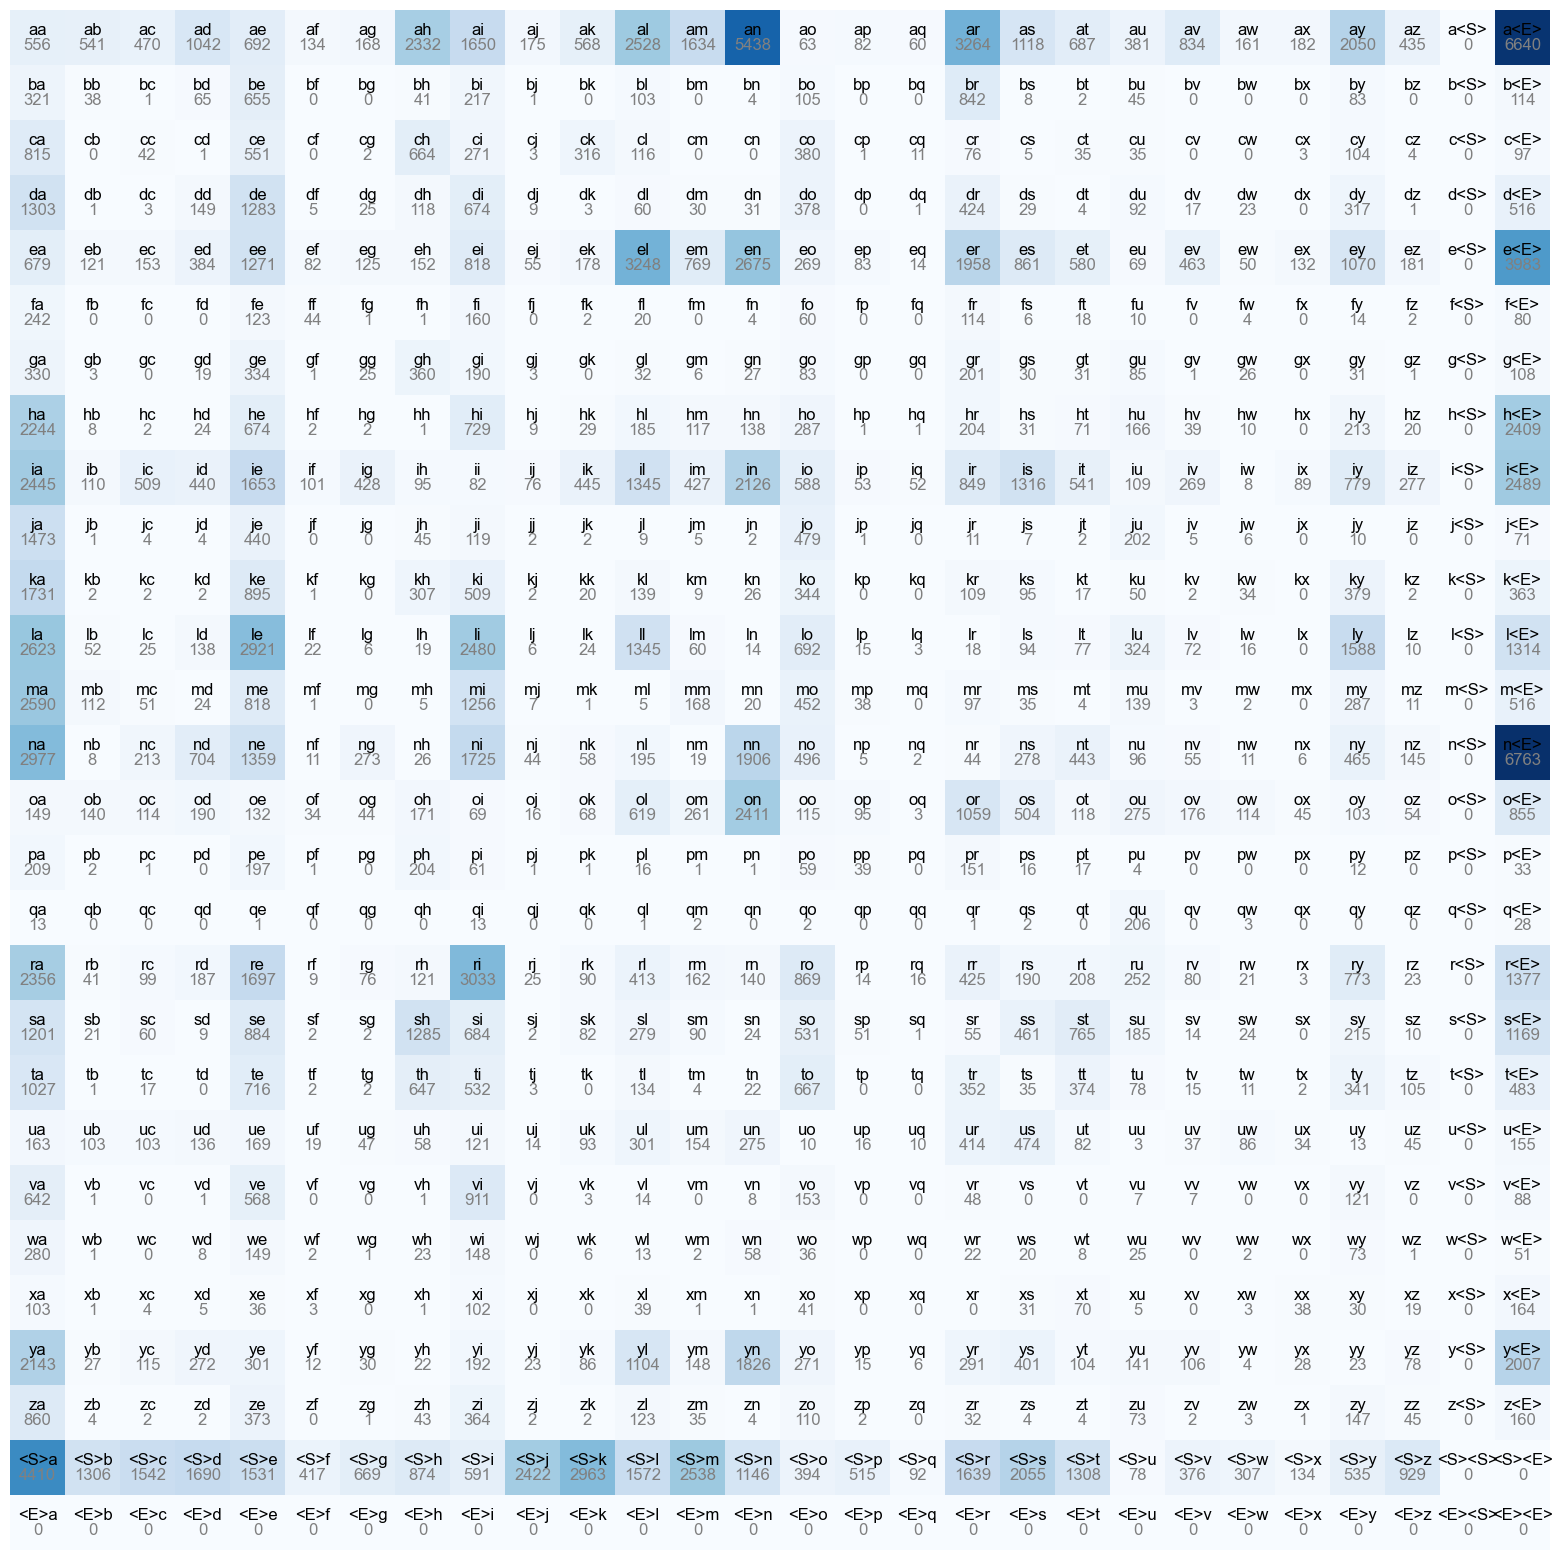

In [39]:
# Nun die Visualsierung in einer Matrix mit den Bigrammen mit dem Bigramm, Count und anhand des Counts in Blau als heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        chstr = idx2char[i] + idx2char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [38]:
print(N[26:28])

tensor([[4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963, 1572,
         2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,  134,
          535,  929,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]], dtype=torch.int32)


Das ist gerade noch nicht so schön, weil z.B. dsa Bigramm "&lt;E&gt;a" niemals vorkommen kann.

Zudem ist das setzen mit den Brackets für die special Tokens "&lt;S&gt;" und "&lt;E&gt;" nicht so schön.
Auch wenn es in NLP quasi eine Konvention ist, spezielle Tokens mit "<" und ">" zu markieren, wollen wir das nicht.

Wir verwenden nur einen und müssen unseren Code etwas anpassen:

In [40]:
# wir gehen von <S> und <E> einfach auf einen Punkt .
N2 = torch.zeros((27, 27), dtype=torch.int32)

In [45]:
# Mapping zwischen Buchstaben und Index
char2idx = {ch: i+1 for i, ch in enumerate(alphabet)}
char2idx["."] = 0 # Start- und Ending-Token soll erstes Element sein

# invertieren des mappings
idx2char = {i: ch for ch, i in char2idx.items()}
idx2char

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [46]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        N2[ix1, ix2] += 1
N2

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

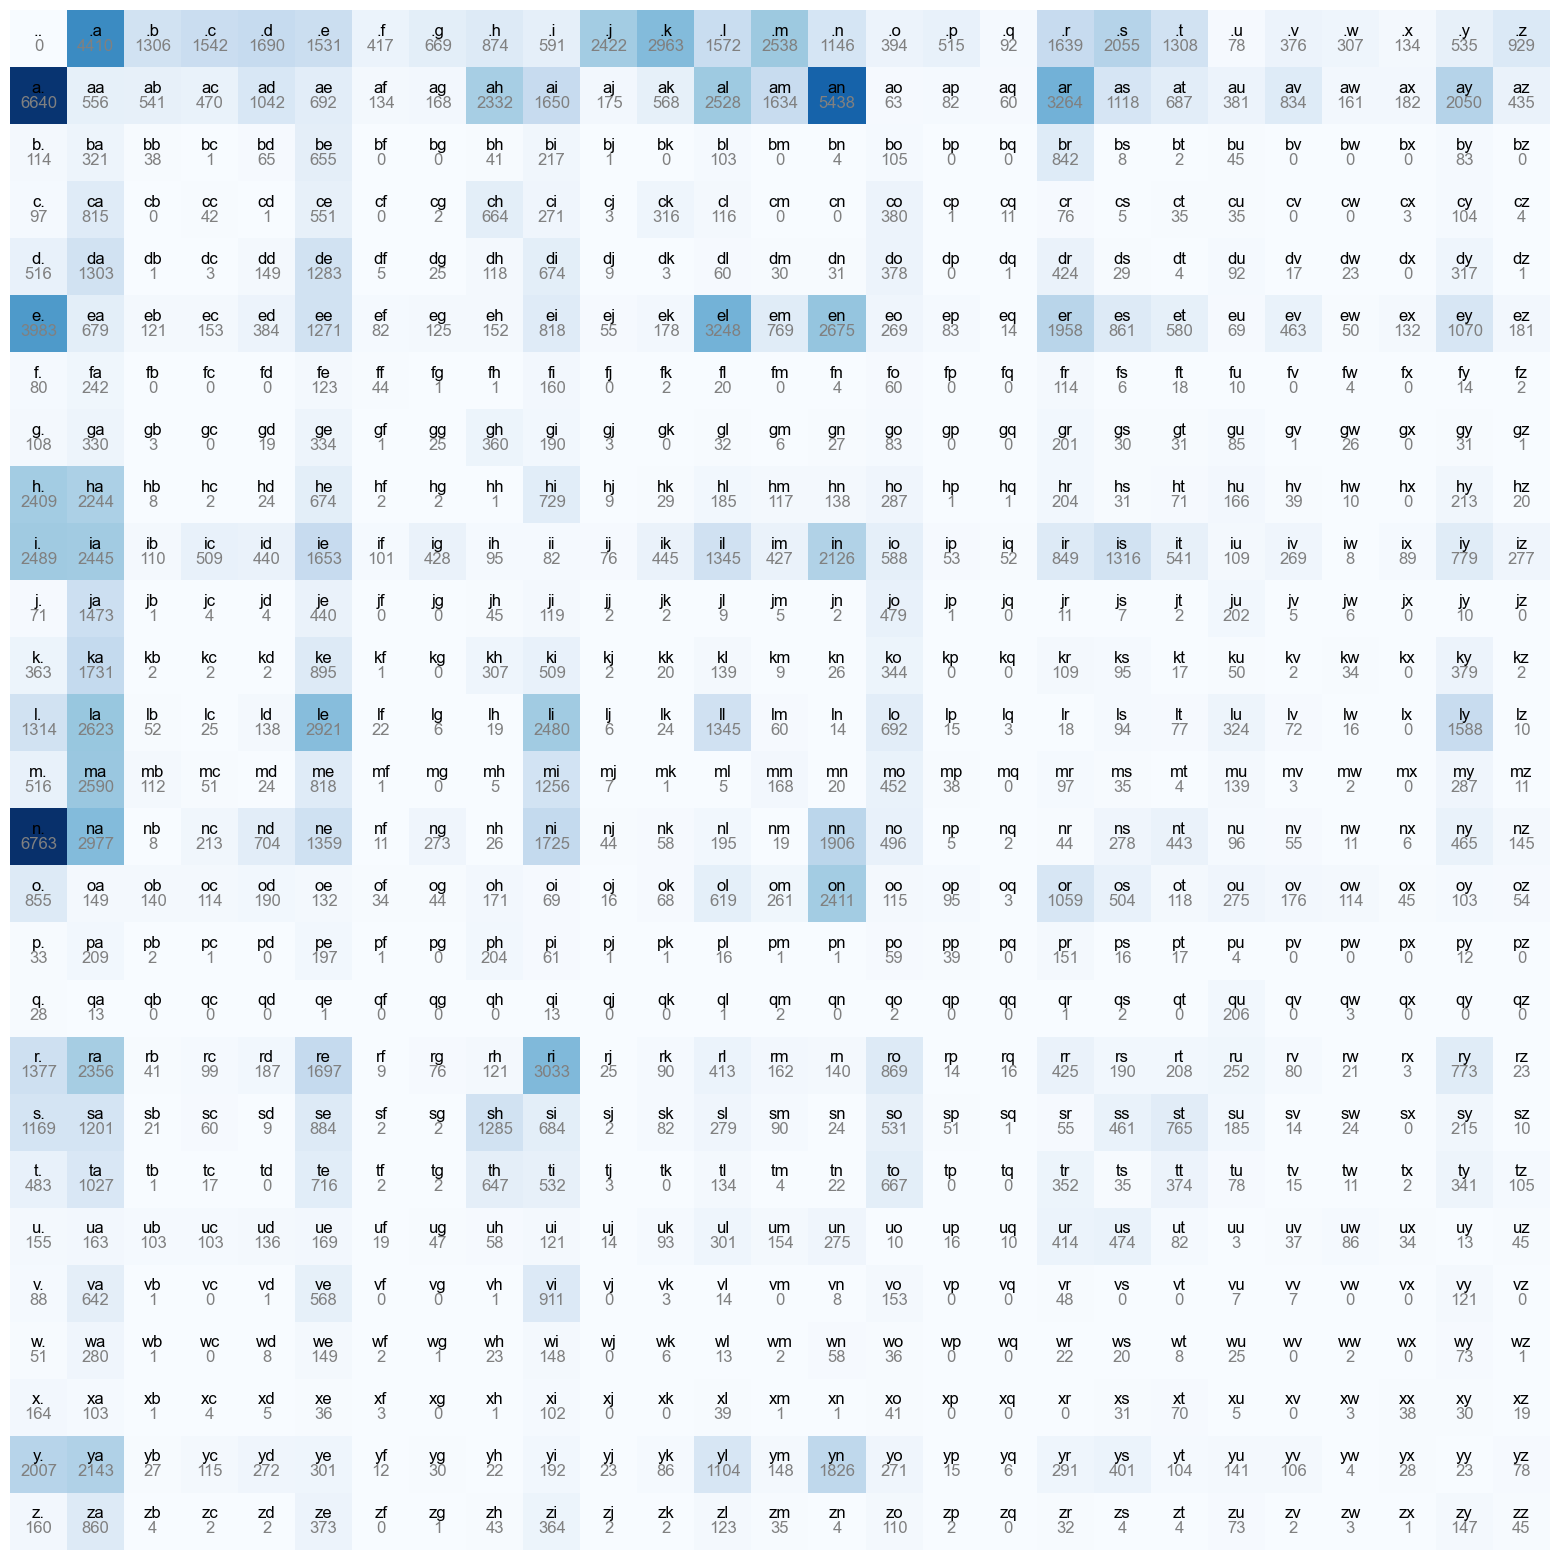

In [48]:
plt.figure(figsize=(20, 20))
plt.imshow(N2, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = idx2char[i] + idx2char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N2[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [49]:
27**2

729

In [72]:
N2.max()

tensor(6763, dtype=torch.int32)

In [73]:
# Anzahl wie oft n. im gesamten Korpus vorkommt
N2[14,0].item()

6763

Da wir nun die rohen Anzahlen der Bigramme haben, müssen wir diese noch in Wahrscheinlichkeiten umwandeln, daher bauen wir nun einen Probability Vector $p$:

In [63]:
p = N2.float() # erstmal zu einem Float weil wir die normalisieren wollen
p = p / p.sum()
p

tensor([[0.0000e+00, 1.9330e-02, 5.7244e-03, 6.7588e-03, 7.4075e-03, 6.7106e-03,
         1.8278e-03, 2.9323e-03, 3.8309e-03, 2.5904e-03, 1.0616e-02, 1.2987e-02,
         6.8903e-03, 1.1124e-02, 5.0231e-03, 1.7270e-03, 2.2573e-03, 4.0325e-04,
         7.1840e-03, 9.0074e-03, 5.7332e-03, 3.4189e-04, 1.6481e-03, 1.3456e-03,
         5.8734e-04, 2.3450e-03, 4.0720e-03],
        [2.9104e-02, 2.4370e-03, 2.3713e-03, 2.0601e-03, 4.5673e-03, 3.0331e-03,
         5.8734e-04, 7.3637e-04, 1.0222e-02, 7.2322e-03, 7.6705e-04, 2.4896e-03,
         1.1081e-02, 7.1621e-03, 2.3836e-02, 2.7614e-04, 3.5942e-04, 2.6299e-04,
         1.4307e-02, 4.9004e-03, 3.0112e-03, 1.6700e-03, 3.6556e-03, 7.0569e-04,
         7.9773e-04, 8.9855e-03, 1.9067e-03],
        [4.9968e-04, 1.4070e-03, 1.6656e-04, 4.3832e-06, 2.8491e-04, 2.8710e-03,
         0.0000e+00, 0.0000e+00, 1.7971e-04, 9.5115e-04, 4.3832e-06, 0.0000e+00,
         4.5147e-04, 0.0000e+00, 1.7533e-05, 4.6023e-04, 0.0000e+00, 0.0000e+00,
         3.6906e-

In [64]:
p.sum()

tensor(1.)

In [71]:
p.max() # ist unser .n

tensor(0.0296)

In [74]:
# wahrscheinlichkeit das ein Name mit a endet -> Bigramm ".a"
print(round(p[14,0].item() * 100, 2), "%")

2.96 %


Diese $2,96$% gilt für alle Bigramme im gesamten Korpus. Also Bigramme die mit "n" enden sind am häufigsten. -> "n."

**Achtung**: Viel interessanter ist natürlich die Aussage wie wahrscheinlich es ist das ein Name mit "n" endet, dafür dürfen wir aber nicht den Korpus verwenden sondern nur die Zeile!

In [81]:
N2[:, 0] # nur die erste Spalte

tensor([   0, 6640,  114,   97,  516, 3983,   80,  108, 2409, 2489,   71,  363,
        1314,  516, 6763,  855,   33,   28, 1377, 1169,  483,  155,   88,   51,
         164, 2007,  160], dtype=torch.int32)

In [122]:
p = N2[:, 0].float()
p = p / p.sum()
p

tensor([0.0000, 0.2073, 0.0036, 0.0030, 0.0161, 0.1243, 0.0025, 0.0034, 0.0752,
        0.0777, 0.0022, 0.0113, 0.0410, 0.0161, 0.2111, 0.0267, 0.0010, 0.0009,
        0.0430, 0.0365, 0.0151, 0.0048, 0.0027, 0.0016, 0.0051, 0.0627, 0.0050])

In [79]:
print(round(p[14].item() * 100, 2), "%")

21.11 %


Das ein Wort mit "n" endet ist also $21,11$% wahrscheinlich.

Wie sieht es aus mit der Wahrscheinlichtkeit, dass ein Wort mit "n" anfängt, also ".n"?

In [123]:
p = N2[0].float() # Erste Zeile
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [83]:
print(round(p[14].item() * 100, 2), "%")

3.58 %


Das ein Name mit "n" anfängt, z.B. wie bei "Niklas" hat also eine Wahrscheinlichkeit von $3,6$%.

Das haben wir jetzt quasi einmal für die erste Spalte und dann für die erste Zeile berechnet. Dort ist die Summe des $p$-Vektors also insg. $1$.

Nun wollen wir anstatt Floats für die Wahrscheinlichkeiten in $p$ Integers haben die dann Normalverteilt sind:

In [95]:
# Für die deterministische Zufälligkeit beim Tutorial:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum() # Normalisierte Verteilung
p

tensor([0.6064, 0.3033, 0.0903])

Nun erstellen wir aus dieser Verteilung, also 60%, 30%, 9% eine beliebige Anzahl an Integern mit der gleichen Verteilung in ihrere Häufigkeit:

In [118]:
multinomial_verteilung = torch.multinomial(p, num_samples=100, replacement=True, generator=g)
multinomial_verteilung

tensor([2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2,
        0, 1, 0, 1])

In [120]:
# zaehlen wie oft die 0 in multinomial_verteilung vorkommt
print("Anzahl 0en:", (multinomial_verteilung == 0).sum().item() )
print("Anzahl 1en:", (multinomial_verteilung == 1).sum().item() )
print("Anzahl 2en:", (multinomial_verteilung == 2).sum().item() )

Anzahl 0en: 62
Anzahl 1en: 29
Anzahl 2en: 9


Damit wir ein NN trainieren können, darf es ja nur ein Sample bekommen, also nur einen Namen mit dem End-Token.
Hier verwenden wir jedoch nun keine Namen sondern nur die Bigramme, indem wir "random" mit der multinomial einen Index eines Buchstabens wählen aus **idx2char**:

In [168]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0 # Erstes Zeile, die wichtige, weil hier die .<buchstabe> stehen, also die Zeile die zeigt wie wahrscheinlich es ist dass ein Name mit ihr anfängt.
    while True:
        p = N2[ix].float() # Wahrscheinlichkeiten für alle Zeichen in der ix'ten Zeile. Ix springt ja durch multinomial immer auf einen wahrscheinlichen index, wodurch dann für den nächsten Buchstaben wieder das nächst wahrscheinliche Bigramm gefunden wird, bis ein "." kommt
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Zufälliges Zeichen aus der Zeile auswählen. Multinomial(p) gibt die Indizes zurück, nicht die Zeichen
        #print(idx2char[ix])
        out.append(idx2char[ix])
        if ix == 0: # Wenn wir am Ende sind, abbrechen, weil "." war ja vom Index 0 in idx2char
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


Wie wir sehen können ist das Bigramm Modell relativ schlecht. Aber wenn wir ein untrainiertes Bigramm Modell nehmen, ist es doch gar nicht mal so schlecht:

In [144]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0 # Erstes Zeile, die wichtige, weil hier die .<buchstabe> stehen, also die Zeile die zeigt wie wahrscheinlich es ist dass ein Name mit ihr anfängt.
    while True:
        #p = N2[ix].float() # Wahrscheinlichkeiten für alle Zeichen in der ix'ten Zeile. Ix springt ja durch multinomial immer auf einen wahrscheinlichen index, wodurch dann für den nächsten Buchstaben wieder das nächst wahrscheinliche Bigramm gefunden wird, bis ein "." kommt
        #p = p / p.sum()
        p = torch.ones(27) / 27 # Gleichverteilung
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Zufälliges Zeichen aus der Zeile auswählen. Multinomial(p) gibt die Indizes zurück, nicht die Zeichen
        #print(idx2char[ix])
        out.append(idx2char[ix])
        if ix == 0: # Wenn wir am Ende sind, abbrechen, weil "." war ja vom Index 0 in idx2char
            break
    print("".join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.


In [ ]:
p = N2[ix].float()
p = p / p.sum()

Die markierte Zeile hier ist sehr ineffizient, da wir jedes mal quasi die Zeile fetchen müssen aus N2. Besser wäre es wenn wir eine Matrix hätten, die direkt anstatt der Anzahl der Bigramme, die Wahrscheinlichkeit des Bigramms speichert, sodass wir mir ihr nur noch multiplizieren müssen:

In [150]:
# Matrix statt Vektor
P = N2.float()
int(P.sum().item())

228146

Wir wollen nun die Zeilen der Bigramm-Matrix in einen 27x1 Vektor umwandeln:

In [148]:
P.sum(1, keepdim=True) 

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [158]:
# ist die Summe der ersten Zeile, sogar direkt die anzahl aller Namen im Korpus, weil jeder Buchstabe im Alphabet einmal als erstes Zeichen vorkommt
P[0].sum()

tensor(32033.)

Diesen Vektor nutzen wir jetzt für die Division der Matrix 27x27 mit unserem P Vektor der Summen 27x1.

Wir teilen jede Zeile durch die Summe der Zeile -> Normalisierte Wahrscheinlichkeiten:

In [169]:
P = N2.float()
P /= P.sum(1, keepdim=True) # mit der inplace Operation "/=" sparen wir uns einen Vektor in der Zwischenrechnung
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [162]:
# Genau das gleiche wie 
p = N2[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Das können wir nun wieder in unseren Bigramm Matrix Code einbauen, und sparen uns dass wir jedesmal die Zeile fetchen müssen und den Vektor $p$ berechnen müssen:

In [170]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0 # Erstes Zeile, die wichtige, weil hier die .<buchstabe> stehen, also die Zeile die zeigt wie wahrscheinlich es ist dass ein Name mit ihr anfängt.
    while True:
        p = P[ix] # Wahrscheinlichkeiten für alle Zeichen in der ix'ten Zeile.
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Zufälliges Zeichen aus der Zeile auswählen. Multinomial(p) gibt die Indizes zurück, nicht die Zeichen
        out.append(idx2char[ix])
        if ix == 0: # Wenn wir am Ende sind, abbrechen, weil "." war ja vom Index 0 in idx2char
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


### Wir gut ist unser Bigramm Modell?
Genau wie bei einem NN wir berechnen wir nun einen Loss auf unserem Trainingskorpus names.txt

Wir können ja nun unsere Matrix $P$ verwenden mit den normalisierten Wahrscheinlichkeiten je Zeile, um zu checken wie Wahrscheinlich ein Bigramm war:

In [178]:
for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(ch1, ch2, f'-> {(prob * 100):.2f}%', f" -> {logprob:.2f}")

. e -> 4.78%  -> -3.04
e m -> 3.77%  -> -3.28
m m -> 2.53%  -> -3.68
m a -> 38.99%  -> -0.94
a . -> 19.60%  -> -1.63
. o -> 1.23%  -> -4.40
o l -> 7.80%  -> -2.55
l i -> 17.77%  -> -1.73
i v -> 1.52%  -> -4.19
v i -> 35.41%  -> -1.04
i a -> 13.81%  -> -1.98
a . -> 19.60%  -> -1.63
. a -> 13.77%  -> -1.98
a v -> 2.46%  -> -3.70
v a -> 24.95%  -> -1.39
a . -> 19.60%  -> -1.63


Die Verwendung des Logarithmus einer Wahrscheinlichkeit (log(p)) für die Berechnung einer Likelihood in Machine Learning hat mehrere praktische Gründe, die sowohl mathematischer als auch rechnerischer Natur sind:

Vermeidung von numerischer Unterlaufproblematik: Wahrscheinlichkeitswerte, speziell in komplexen Modellen oder bei der Multiplikation vieler kleiner Wahrscheinlichkeiten (wie es oft bei Likelihood-Berechnungen der Fall ist), können sehr klein werden. Diese kleinen Werte können zu numerischen Unterlaufproblemen führen, da Computer bei der Darstellung extrem kleiner Zahlen ungenau werden. Durch die Verwendung des Logarithmus werden diese kleinen Werte in größere, handhabbare Zahlen transformiert.


Wir wollen nun ein NN trainieren, dass die Wahrscheinlichkeiten der Bigramme in unserem Datensatz vorhersagt, so wie sie o.g. tatsächlich auch sind.
Damit wir am Ende ein Skalar haben/eine Loss-Function verwenden wir die Maximum-Likelihood über alle Bigramme, als log(P), da wir so einen Wert bekommen, mit dem wir das NN trainieren können.

Dafür verwenden wir einen negative Log-Loss, sodass ein Loss von $0$ optimal wäre und $>0$ schlechter:

In [186]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(ch1, ch2, f'-> {(prob * 100):.2f}%', f" -> {logprob:.2f}")

print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"Negative_Log-Likelihood: {-log_likelihood:.2f}")
normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

. e -> 4.78%  -> -3.04
e m -> 3.77%  -> -3.28
m m -> 2.53%  -> -3.68
m a -> 38.99%  -> -0.94
a . -> 19.60%  -> -1.63
. o -> 1.23%  -> -4.40
o l -> 7.80%  -> -2.55
l i -> 17.77%  -> -1.73
i v -> 1.52%  -> -4.19
v i -> 35.41%  -> -1.04
i a -> 13.81%  -> -1.98
a . -> 19.60%  -> -1.63
. a -> 13.77%  -> -1.98
a v -> 2.46%  -> -3.70
v a -> 24.95%  -> -1.39
a . -> 19.60%  -> -1.63
Log-Likelihood: -38.79
Negative_Log-Likelihood: 38.79
Average Negative Log-Likelihood: 2.42


Die "Average Negative Log-Likelihood" wäre also nun eine gute Loss-Function für unser NN.

Man verwendet denn "Average", weil wir so weniger Abhängigkeit zur Größe des Trainingsdatensatzes haben, wir normalisieren also. Zudem stabilisiert es das Training, sowie auch die Wahl der Hyperparameter, da diese genau wie der Loss dann weniger variieren.

Zu guter Letzt ist dieser Score intuitiver, da er den "Score" angibt, dass ein Bigramm aus dem Trainingsdatensatz kommt.

In [188]:
# Über den gesamten Datensatz:

log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"Negative_Log-Likelihood: {-log_likelihood:.2f}")
normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

Log-Likelihood: -559891.75
Negative_Log-Likelihood: 559891.75
Average Negative Log-Likelihood: 2.45


Diesen Alg. können wir nun auch verwenden um zu bestimmen wie Wahrscheinlich ein Name ist, hinsichtlich seiner enthaltenen Bigramme:

In [203]:
log_likelihood = 0.0
n = 0
for w in ["anna"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}", f'-> {(prob * 100):.2f}%', f" -> {logprob:.2f}")

print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"Negative_Log-Likelihood: {-log_likelihood:.2f}")
normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

.a -> 13.77%  -> -1.98
an -> 16.05%  -> -1.83
nn -> 10.40%  -> -2.26
na -> 16.24%  -> -1.82
a. -> 19.60%  -> -1.63
Log-Likelihood: -9.52
Negative_Log-Likelihood: 9.52
Average Negative Log-Likelihood: 1.90


"Anna" scheint also ein relativ Wahrscheinlicher Name zu sein, zumindest was seine Bigramme angeht. Das liegt einfach daran, dass es sehr Wahrscheinlich ist, dass ein Name mit "a" anfängt und auch mit "a" endet und das Bigramm "an" oder "na" enhalten ist. Und das ist ein sehr wichtiger Punkt:

### Was wir hier wirklich gemacht haben:

1. Wir haben die Wahrscheinlichekeit für jedes Bigramm im Korpus names.txt berechnet.
2. Indem wir die p(Bigramm)'s in einem Namen multiplizieren, bekommen wir nicht P des ganzen Namens sondern nur die Likelihood mit der diese Bigramm in dieser Reihenfolgen auftreten -> Also eine *bedingte Wahrshceinlichkeit*.
3. Da dieser Wert so gering ist, haben wir ihn mit dem Logarithmus transformiert, sodass wir einen Wert bekommen, der nicht mehr so klein ist.
4. Für diesen Wert nehmen wir nun als Loss, den negativen Logarithmus, sodass wir einen Wert haben, der umso größer ist, je unwahrscheinlicher die Bigramm-Folge ist.
5. Wir nehmen den Durchschnitt über alle Bigramme, sodass wir einen Wert haben, der umso größer ist, je unwahrscheinlicher die Bigramm-Folge ist, ohne das wir von der Größe des Datensatzes abhängig sind.

Diesen Score, also den "*Average Negative Log-Likelihood*" können wir nun als Loss-Score verwenden um ein NN zu trainieren dass Bigramme erzeugen soll, die möglichst wahrscheinlich sind, indem wir versuchen durch Optimierung der Weights und Biases den Score zu minimieren.

Das NN bekommt also ein Zeichen und soll einfach das nächste Zeichen vorhersagen, indem es die Wahrscheinlichkeiten für alle möglichen Zeichen ausgibt.

Einen Bug haben wir noch, wenn Bigramme in einem Namen enthalten sind die vorkammen wie "jq", gibt uns der $Log(0)=-∞$ 

In [204]:
log_likelihood = 0.0
n = 0
for w in ["annajq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}", f'-> {(prob * 100):.2f}%', f" -> {logprob:.2f}")

print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"Negative_Log-Likelihood: {-log_likelihood:.2f}")
normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

.a -> 13.77%  -> -1.98
an -> 16.05%  -> -1.83
nn -> 10.40%  -> -2.26
na -> 16.24%  -> -1.82
aj -> 0.52%  -> -5.27
jq -> 0.00%  -> -inf
q. -> 10.29%  -> -2.27
Log-Likelihood: -inf
Negative_Log-Likelihood: inf
Average Negative Log-Likelihood: inf


Das ist natürlich kein Score mit dem man arbeiten kann, deswegen fixen wir das nun:

In [209]:
# In der Zeile der j<char> Bigramme, gibt es einige Nullen
N2[10]

tensor([  71, 1473,    1,    4,    4,  440,    0,    0,   45,  119,    2,    2,
           9,    5,    2,  479,    1,    0,   11,    7,    2,  202,    5,    6,
           0,   10,    0], dtype=torch.int32)

In [208]:
(N2+1)[10] # Durch das adden einer 1 smoothen wir die Verteilung, damit wir keine Nullen mehr haben und kein -inf entsteht.

tensor([6764, 2978,    9,  214,  705, 1360,   12,  274,   27, 1726,   45,   59,
         196,   20, 1907,  497,    6,    3,   45,  279,  444,   97,   56,   12,
           7,  466,  146], dtype=torch.int32)

In [210]:
# P Matrix neuberechnen:
P = (N2+1).float()
P /= P.sum(1, keepdim=True)

In [211]:
log_likelihood = 0.0
n = 0
for w in ["annajq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}", f'-> {(prob * 100):.2f}%', f" -> {logprob:.2f}")

print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"Negative_Log-Likelihood: {-log_likelihood:.2f}")
normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

.a -> 13.76%  -> -1.98
an -> 16.04%  -> -1.83
nn -> 10.39%  -> -2.26
na -> 16.23%  -> -1.82
aj -> 0.52%  -> -5.26
jq -> 0.03%  -> -7.98
q. -> 9.70%  -> -2.33
Log-Likelihood: -23.47
Negative_Log-Likelihood: 23.47
Average Negative Log-Likelihood: 3.35


### Das Bigramm-Problem ins Neuralnet Format casten
Wir wollen nun also das Trainingsset aller Bigramme in names.txt verwenden, um ein NN zu trainieren, dass die Wahrscheinlichkeit des nächsten Buchstabens vorhersagt, gegeben dem vorherigen Buchstaben.

In [264]:
xs, ys = [], [] # xs ist Input, xy ist der Target Output -> Ein Trainingssample ist also (x, y)

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(ch1, ch2, ix1, ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e 0 5
e m 5 13
m m 13 13
m a 13 1
a . 1 0


In [218]:
xs

tensor([ 0,  5, 13, 13,  1])

In [219]:
xy

tensor([ 5, 13, 13,  1,  0])

Das sind nu die Indizes der jeweiligen Zeichen im char2idx, wir parsen nun nur die Eingabe in One-Hot-Vektoren:

In [223]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [224]:
xenc.shape

torch.Size([5, 27])

Das hier sind also 5 Eingabe-One-Hot-Vektoren für 27 Eingangsneuronen die wir bauen werden. **xenc** ist also eine Art Batch-Matrix.

In [255]:
# Nun die Gewichte
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
xenc @ W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

Da ist die Gewichtsmatrix zwischen der Input- und der Softmax-Schicht

Da wir One-Hot-Vektoren eingegeben haben: (5,27) @ (27,27) -> (5, 27)

Würden wir alle Buchsten One-Hot codieren, hätten wir am Ende 27x Inputs und nicht 5.

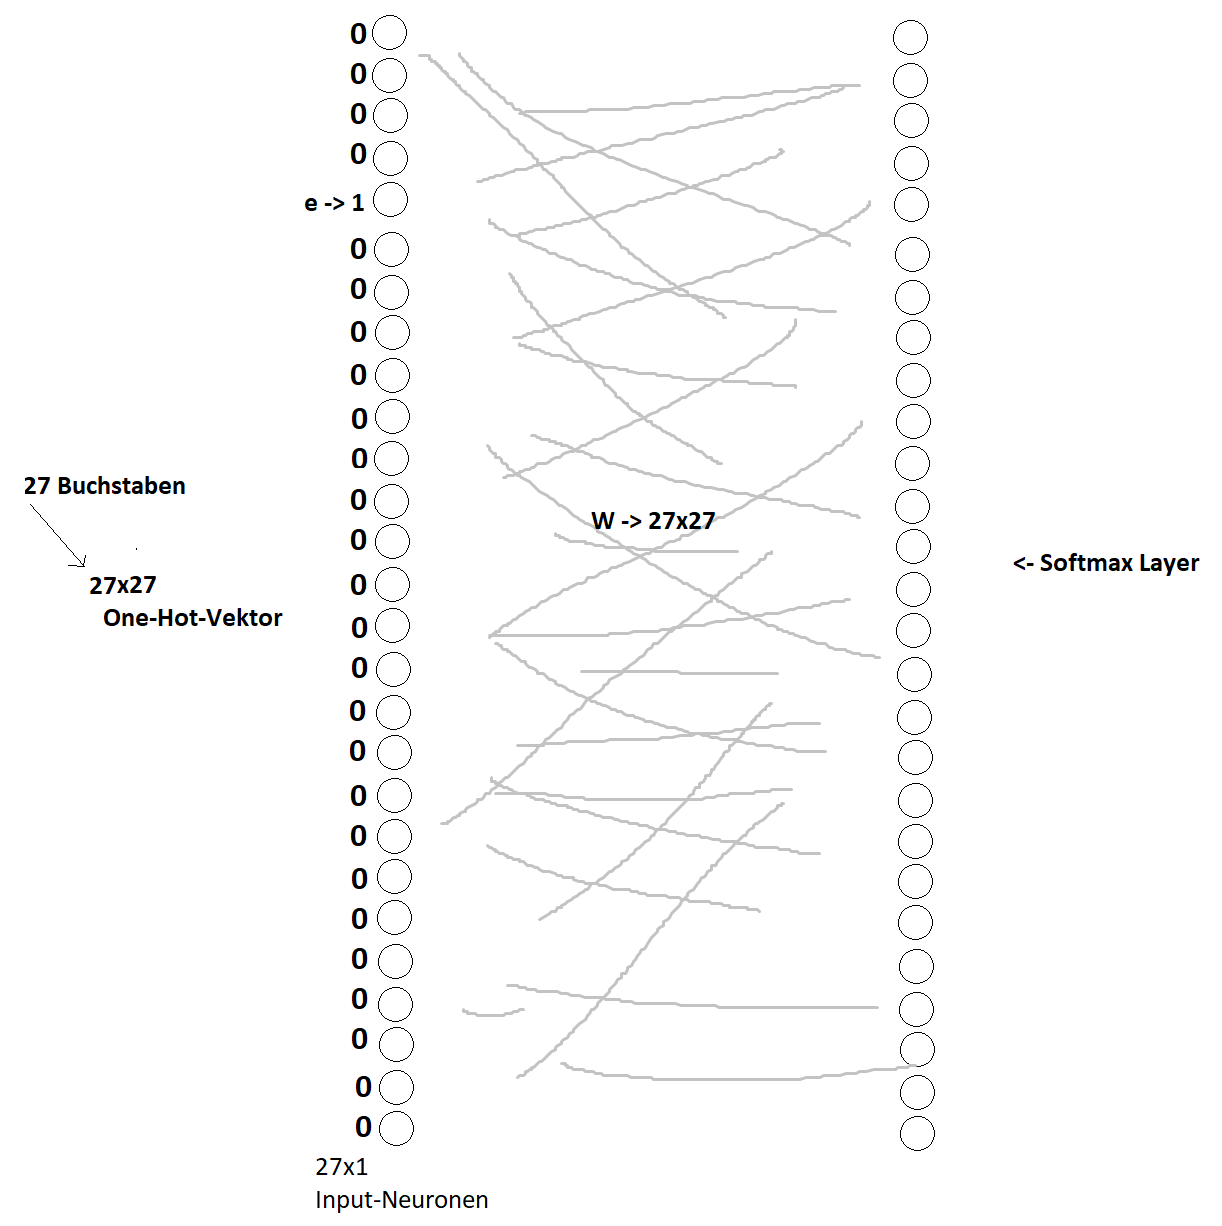

In [256]:
# Was sagt einem nun die Matrix (5, 27) für unsere 5 Samples:

(xenc @ W)[3, 13] # Gibt uns die Feuerrate des 13. Neurons für das 3. Sample

tensor(0.0379)

In [257]:
W[:, 13]

tensor([-4.3297e-01, -9.6478e-01,  2.1346e+00, -7.2759e-01, -1.3753e-01,
        -1.3132e-03, -3.1566e-01,  1.1199e+00, -4.7701e-01, -1.5065e+00,
         1.2108e+00, -4.0636e-01,  1.9110e-01,  3.7882e-02,  1.3431e+00,
         2.4311e-01, -1.5364e-01, -1.1583e+00,  1.1614e+00,  4.2016e-01,
         2.7359e-01,  3.6583e-01,  1.7128e+00,  1.3769e+00, -8.9778e-01,
        -9.5177e-01,  1.4723e-01])

In [258]:
xenc[3] @ W[:, 13] # Gibt uns die Feuerrate des 13. Neurons für das 3. Sample

tensor(0.0379)

Da wir versuchen mit diesem NN die Verteilung der Wahrscheinlichkeiten einer Zeile aus der Bigramm-Matrix zu erlernen, sollte unser Output Layer genauso wie unsere ehemalige Matrix $P$, auch positive und normierte Werte haben.

Dafür implementieren wir Softmax:

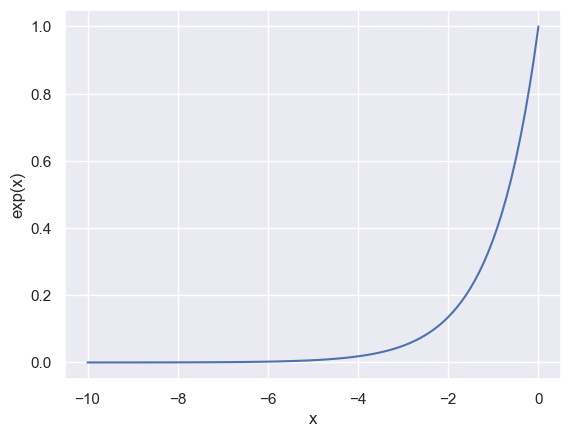

In [236]:
# wir verwenden e^x da wir so für sehr negative Werte max "0" kriegen und bis 0 max "1"
# ein Plot der Funktion im Bereich -5 bis +1:
x = np.linspace(-10, 0, 100)
plt.plot(x, np.exp(x))
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.show()

In [259]:
(xenc @ W).exp() # exp() macht e^x

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  2.8830, 11.0032,  1.5972,  0.5187,  1.8527,
          0.5369,  1.6654,  3.8818,  1.2642,  0.6339,  0.9987,  0.5995,  1.7432,
          1.6073,  0.2499,  5.0680,  1.1876,  2.6871,  1.6596,  2.7728,  0.1486,
          0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373,
          2.2763,  0.4719,  2.5289,  0.2265,  0.8082,  0.3054,  0.5164,  0.7918,
          4.6866,  1.8232,  0.4921],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373

In der Praxis formuliert man das etwas anders:

In [260]:
logits = xenc @ W # log-counts
counts = logits.exp() # counts -> Genau wie N2
probs = counts / counts.sum(1, keepdim=True) # -> Genau wie P
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [262]:
probs[0].sum().item() # Softmax erfolgreich:

1.0000001192092896

$$
s(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

Fassen wir alle zusammen und machen einen Bruteforce-Test am Beispiel von ".emma.":

In [278]:
nlls = torch.zeros(5) # Negative Log-Likelihoods

for i in range(5): # ".emma"
    x = xs[i].item()
    y = ys[i].item()
    print("----")
    print("Biagramm:", idx2char[x], idx2char[y])
    print("Input to NN:", x)
    print("Softmax:", probs[i])
    print("Target:", y)
    p = probs[i, y]
    print(f"NN denkt P({idx2char[x]} {idx2char[y]}) =", p.item())

    logp = torch.log(p)
    print("Log-Prob:", logp)

    nll = -logp
    print("Negative Log-Likelihood:", nll.item())

    nlls[i] = nll

print("----")
print("Average Negative Log-Likelihood:", nlls.mean().item())

----
Biagramm: . e
Input to NN: 0
Softmax: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Target: 5
NN denkt P(. e) = 0.01228625513613224
Log-Prob: tensor(-4.3993)
Negative Log-Likelihood: 4.399273872375488
----
Biagramm: e m
Input to NN: 5
Softmax: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
Target: 13
NN denkt P(e m) = 0.018050700426101685
Log-Prob: tensor(-4.0146)
Negative Log-Likelihood: 4.014570713043213
----
Biagramm: m m
Input to NN: 13
Softmax: tensor([0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
        0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 

Hier kann man deutlich erkennen, dass das NN sehr geringe P's für die jeweiligen nächsten Zeichen angibt, weil es gerade noch komplett random ist, wir müssen nun mit Backprop $W$ trainieren, sodass sich der Output-Layer immer mehr der jeweiligen Zeile in der Matrix $P$ annähert, die wir händisch aus **N2** berechnet hatten.

### Backpropagation
Das vorhin war quasi ein Forward-Pass, bei dem wir die 5 Samples durch das NN gejagt haben und am Ende den Loss berechnet haben.
Nun wollen wir $W$ updaten, nach jedem Sample, sodass der Loss kleiner wird.

In [393]:
# Trainings-Set Generierung
xs, ys = [], [] # xs ist Input, xy ist der Target Output -> Ein Trainingssample ist also (x, y)
for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [394]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # requires_grad=True, damit wir die Gradienten berechnen können
logits = xenc @ W # log-counts
counts = logits.exp() # counts -> Genau wie N2
probs = counts / counts.sum(1, keepdim=True) # -> Genau wie P
probs.shape

torch.Size([5, 27])

In PyTorch ist der Parameter `requires_grad` ein wichtiges Konzept für die automatische Differentiation, die für das Training von neuronalen Netzen und die Berechnung von Gradienten verwendet wird.

Wenn `requires_grad=True` für eine Tensor-Variable festgelegt ist, speichert PyTorch automatisch die Berechnungsschritte, die zur Erzeugung dieses Tensors erforderlich waren. Dadurch kann PyTorch den Gradienten des Tensors automatisch berechnen, wenn eine Backpropagation durchgeführt wird.

Damit wir nun den Loss berechnen können pro Sample, müssen wir die richtigen Zeilen, je Sample finden.

Remember: Ein Sample war ein Bigramm, wobei der Input ein Buchstabe war und der Output der nächste Buchstabe.

In [395]:
# Damit wir die Wahrscheinlichkeit vom nächsten Zeichen 5 bekommen können wir direkt über Index=5 gehen weil Index=0 ja der Punkt war:
print("1st Sample mit 5.  Buchstabe:", f"{(probs[0, 5].item() * 100):.2f}%",  "->", idx2char[0], idx2char[5])
print("2nd Sample mit 13. Buchstabe:", f"{(probs[1, 13].item() * 100):.2f}%", "->", idx2char[5], idx2char[13])
print("3rd Sample mit 13. Buchstabe:", f"{(probs[2, 13].item() * 100):.2f}%", "->", idx2char[13], idx2char[13])
print("4th Sample mit 1.  Buchstabe:", f"{(probs[3, 1].item()  * 100):.2f}%", "->", idx2char[13], idx2char[1])
print("5th Sample mit 1.  Buchstabe:", f"{(probs[4, 0].item()  * 100):.2f}%", "->", idx2char[1], idx2char[0])

1st Sample mit 5.  Buchstabe: 1.23% -> . e
2nd Sample mit 13. Buchstabe: 1.81% -> e m
3rd Sample mit 13. Buchstabe: 2.67% -> m m
4th Sample mit 1.  Buchstabe: 7.37% -> m a
5th Sample mit 1.  Buchstabe: 1.50% -> a .


Das sind die Wahrscheinlichkeiten die unser NN dafür berechnet hat, noch ziemlich schlecht...

In [396]:
# Einfacheres indexing
probs[torch.arange(5), ys] # torch.arange(5) gibt uns ein Tensor mit den Werten 0 bis 4

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [398]:
# forward pass (um loss ergänzt)
xenc = F.one_hot(xs, num_classes=27).float()
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # requires_grad=True, damit wir die Gradienten berechnen können
logits = xenc @ W # log-counts
counts = logits.exp() # counts -> Genau wie N2
probs = counts / counts.sum(1, keepdim=True) # -> Genau wie P
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7693049907684326

In [399]:
# backward pass
W.grad = None # set the Gradiet of the Weights to "0"
loss.backward() # PyTorch berechnet hier voll automatisch den Gradienten, da wir requires_grad=True gesetzt haben und er sich alle Schritte der Manipulation von W gemerkt hat

In [400]:
print(W.shape)
print(W.grad.shape)

torch.Size([27, 27])
torch.Size([27, 27])


Das ist nun der Gradient für alle 5 Samples zuvor.

In [401]:
# Update Weights
W.data += -0.1 * W.grad # W.data ist der Tensor der die eigentlichen Daten enthält, W.grad ist der Gradient, -0.1 ist die Lernrate

In [403]:
# Test ob sich Loss veringert hat.
logits = xenc @ W # log-counts
counts = logits.exp() # counts -> Genau wie N2
probs = counts / counts.sum(1, keepdim=True) # -> Genau wie P -> Output vom NN
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7492127418518066

Hat sich um 0.02 verbessert. Das kann man nun solange wiederholen bis das NN die 5 Samples gelernt hat.

In [487]:
# Samples generieren
xs, ys = [], [] # xs ist Input, xy ist der Target Output -> Ein Trainingssample ist also (x, y)
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Num of Samples:", num)

# Initialisierung des NN
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()

Num of Samples: 228146


In [488]:
# Gradient Descent in 300 Schritten
for k in range(400):

    # forward pass
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts -> Genau wie N2,
    probs = counts / counts.sum(1, keepdim=True) # -> Genau wie P -> Output vom NN
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # Update Weights
    W.data += -50 * W.grad

3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097293376922607
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129


$2,45$ hatten wir ganz am Anfang auch, als wir noch kein NN verwendet hatten und einfach so den Loss berechnet hatten. Das ist also der Loss den wir erreichen wollen.

Der Loss wird auch nicht besser werden, weil sich die Werte natürlich im Datensatz immer wieder überschreiben.

In [418]:
# Anstatt mit NN mit P über den gesamten Datensatz:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char2idx[ch1]
        ix2 = char2idx[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

normalised_negative_log_likelihood = -log_likelihood / n
print(f"Average Negative Log-Likelihood: {normalised_negative_log_likelihood:.2f}")

Average Negative Log-Likelihood: 2.45


### Warum Gradient Descent hier besser ist als unser Versuch mit dem statistischen Bigramm-Modell
Ein NN mit Gradient Descent ist viel flexibler für mehrere Inputs, wenn wir sagen wir Trigramme verwenden hätten wir bereits $27^3 = 19.683$ Kombinationsmöglichkeiten.
Hier würden wir dem NN also immer zwei Buchstaben geben und es soll den Dritten vorhersagen, des aktuellen Trigramms. Wenn wir hierfür eine 2D-Heatmap-Tabelle zeichnen wollten,
wäre das schon zu groß zur Visualisierung.

Bei einem NN können wir das aber ohne Probleme machen, der Code zu Generierung der Samples und des Backward-Passes bleibt erstmal gleich. Egal wie komplex wir das NN machen, oder ob wir sein Struktur verändern.
Nur der Forward-Pass wird sich verändern.

Und für die Vorhersage von nächsten Buchstaben sind die Vergangenen ja sehr wichtig, daher ist ein NN hier besser als ein statistisches Modell.
Auch weil es dann durch emergente Eigenschaften, die wir nicht vorhergesehen haben, bessere Ergebnisse liefern kann.

Denn Namen sind ja nicht einfach nur wahrscheinliche Folgen von N-Grammen.

In [508]:
# Namens erzeugung mit dem NN:
g = torch.Generator().manual_seed(2147483647) # wenn man das entfernt, bekommt man random namen
for i in range(5):
    out = []
    ix = 0

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(idx2char[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [494]:
# Alte Generierung mit Bigramm-Matrix:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0 # Erstes Zeile, die wichtige, weil hier die .<buchstabe> stehen, also die Zeile die zeigt wie wahrscheinlich es ist dass ein Name mit ihr anfängt.
    while True:
        p = P[ix] # Wahrscheinlichkeiten für alle Zeichen in der ix'ten Zeile.
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Zufälliges Zeichen aus der Zeile auswählen. Multinomial(p) gibt die Indizes zurück, nicht die Zeichen
        out.append(idx2char[ix])
        if ix == 0: # Wenn wir am Ende sind, abbrechen, weil "." war ja vom Index 0 in idx2char
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
